In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [157]:
df = pd.read_csv('./Customer_Data.csv', sep=';', encoding='ISO-8859-1')
df.head(2)

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.07220,38237.44252,3727.113162,15708.23968,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.51902,5690.74244,18733.810960,38284.35443,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9


In [158]:
df.shape

(8950, 18)

## Comparación con el diccionario de datos

Las siguientes columnas son todas númericas a excepción de ID, el cual es una cadena de caracteres. Además, se verifica que correspondan los nombres de las columnas en el diccionario de datos y en el conjunto de datos.

In [159]:
df.dtypes

ID                      object
SALDO                  float64
F_SALDO                float64
COMPRAS                float64
COMPRAS_PUNTUALES      float64
COMPRAS_PLAZOS         float64
AVANCE_EFECTIVO        float64
F_COMPRAS              float64
F_COMPRAS_PUNTUALES    float64
F_COMPRAS_PLAZOS       float64
F_AVANCE_EFECTIVO      float64
P_AVANCE_EFECTIVO        int64
P_COMPRAS                int64
LÍMITE_CREDITO         float64
PAGOS                  float64
PAGOS_MINIMOS          float64
F_PAGOS_COMPLETOS      float64
MESES_CLIENTE            int64
dtype: object

# Perfilamiento

Primero que todo hagamos el análisis de las columnas en base a su distribución. En cuanto a las distribuciones se nota lo siguiente:

| Columna | Estadisticas |
| - | - |
| SALDO | Una distribución bimodal. Una parte de los datos se agrupan por debajo de 100000 y otros por encima de este límite. |
| F_SALDO | Una distribución bimodal. Una parte de los datos se encuentra por debajo de 0.4 y otra parte de los mismos por encima de este número |
| COMPRAS | Una distribución multimodal. Tenemos tres picos pronunciados, uno de ellos en 80000, otro cerca de 270000 y el ultimo por 420000. | 
| COMPRAS_PUNTUALES | Una distribución bimodal. Los datos se agrupan por debajo o por encima de 20000. |
| COMPRAS_PLAZOS | Una distribución multimodal. Los datos se agrupan en 3 grupos marcados. Por debajo de 8000, por encima de 8000 y debajo de 15000, y el último grupo por encima de 15000. | 
| AVANCE_EFECTIVO | Una distribución mas que todo bimodal. Se agrupan los registros por debajo y arriba de 30000. |
| F_COMPRAS | Una distribución bimodal. Se observan dos grupos principales: uno alrededor de 0.4 y otro cerca de 0.8, lo que sugiere que hay clientes con diferentes patrones de frecuencia de compra. |
| F_COMPRAS_PUNTUALES | Una distribución bimodal. Los datos se agrupan en dos picos principales, uno alrededor de 0.3 y otro cerca de 0.7, indicando que los clientes tienden a realizar compras puntuales con distintas frecuencias. |
| F_COMPRAS_PLAZOS  | Una distribución bimodal. Los datos se agrupan alrededor de 0.2 y entre 0.5 y 0.8, lo que indica que hay clientes que realizan compras a plazos con distintas frecuencias. |
| F_AVANCE_EFECTIVO | Una distribución bimodal. Se observa un grupo alrededor de 0.2 y otro cercano a 1, lo que sugiere que hay clientes que realizan avances en efectivo con diferentes patrones. |
| P_AVANCE_EFECTIVO | Una distribución unimodal con una concentración de datos entre 70 y 100, con una leve cola hacia valores más altos. Indica que la mayoría de los clientes realiza avances en efectivo en ese rango. |
| P_COMPRAS | Una distribución bimodal. Se observan dos grupos principales: uno alrededor de 100 y otro cercano a 200-250, lo que sugiere diferentes patrones de compra entre los clientes. | 
| LIMITE_CREDITO | Una distribución multimodal. Se observan tres grupos principales: uno alrededor de 5000, otro entre 10000 y 20000, y un último grupo cerca de 30000. |
| PAGOS | Una distribución multimodal con tres picos bien definidos: uno alrededor de 10000, otro cerca de 20000-30000, y un tercero alrededor de 50000. | 
| PAGOS_MINIMOS | Una distribución multimodal. Se observan tres grupos: uno cerca de 20000, otro alrededor de 40000 y el último en 60000-70000. |
| F_PAGOS_COMPLETOS | Una distribución bimodal. Los datos se agrupan alrededor de 0.2 y 0.8, indicando que hay clientes que pagan frecuentemente y otros que lo hacen con menor regularidad. |

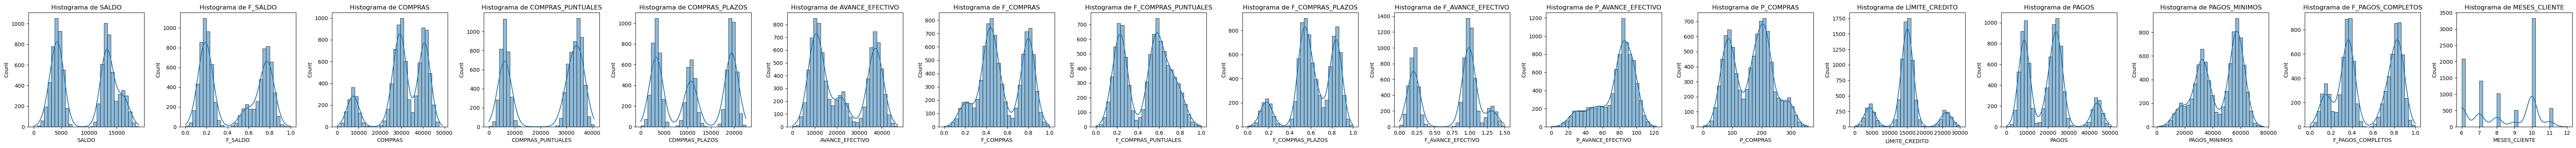

In [160]:
number_cols = df.select_dtypes(include = ['int64','float']).columns
num_cols = len(number_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(4 * num_cols, 4))

# Graficar histogramas para cada columna numérica
for ax, col in zip(axes, number_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

Sobre las estadisticas descriptivas de cada una de las columnas se nota que en general los datos tienen una desviación estandar bastante alta en comparación con los rangos en los que se definen, esto se justifica con las distribuciones graficadas arriba. Esto debido a que no son distribuciones unimodales, por lo tanto, la varianza entre los datos es bastante amplia. 

In [161]:
df[[col for col in number_cols if 'F_' not in col]].describe()

,SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000
mean,9382.387900,30525.873439,22913.665720,11407.851805,22573.474202,76.169162,164.981453,14696.640361,19824.347218,44222.977795,8.370615
std,5118.113559,11041.410943,13573.919086,7087.102996,12594.295895,22.260935,71.322003,5537.074673,11069.268177,15468.314241,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,6.000000
25%,4275.036859,27106.651598,6698.252490,3736.720194,10944.431108,65.000000,97.000000,13487.727310,9329.603116,31572.127680,7.000000
50%,12007.718810,30934.582275,31011.033490,10832.141085,19465.792260,82.000000,176.000000,14942.545350,21367.621275,48780.271750,8.000000
75%,13740.565878,39825.160795,34495.416422,19127.083038,36150.722568,92.000000,216.000000,16269.727120,25219.127372,57761.175980,10.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520,12.000000


In [162]:
df[[col for col in number_cols if 'F_' in col]].describe()

,F_SALDO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,F_PAGOS_COMPLETOS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.459205,0.559810,0.478032,0.623916,0.734946,0.545414
std,0.282998,0.214055,0.221873,0.208207,0.422563,0.267443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.188490,0.407273,0.250856,0.518231,0.230716,0.336732
50%,0.306650,0.505305,0.533521,0.607608,0.947651,0.432690
75%,0.756061,0.777084,0.649120,0.814929,1.029172,0.815178
max,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000


# Calidad de datos

## Completitud

En la siguiente celda se nota que hay 313 registros con valores nulos en la columna `PAGOS_MINIMOS`. Además, tenemos un registro tiene la columna `LÍMITE_CREDITO` en nulo.

In [163]:
df.isna().sum()

ID                       0
SALDO                    0
F_SALDO                  0
COMPRAS                  0
COMPRAS_PUNTUALES        0
COMPRAS_PLAZOS           0
AVANCE_EFECTIVO          0
F_COMPRAS                0
F_COMPRAS_PUNTUALES      0
F_COMPRAS_PLAZOS         0
F_AVANCE_EFECTIVO        0
P_AVANCE_EFECTIVO        0
P_COMPRAS                0
LÍMITE_CREDITO           1
PAGOS                    0
PAGOS_MINIMOS          313
F_PAGOS_COMPLETOS        0
MESES_CLIENTE            0
dtype: int64

In [164]:
sim = SimpleImputer(strategy='mean')
df['LÍMITE_CREDITO'] = sim.fit_transform(df[['LÍMITE_CREDITO']])

En la siguiente ejecución se puede ver que estos 313 registros con columna nula son una muestra representativa del conjunto total de datos. Esto debido a que las distribuciones de los registros con valores nulos son muy parecidos a la distribución de los datos completos. Debido a esto no se puede asignar un valor de `LÍMITE_CREDITO` con un estadistico central ya que no representaria correctamente el grupo al que podría pertenecer.

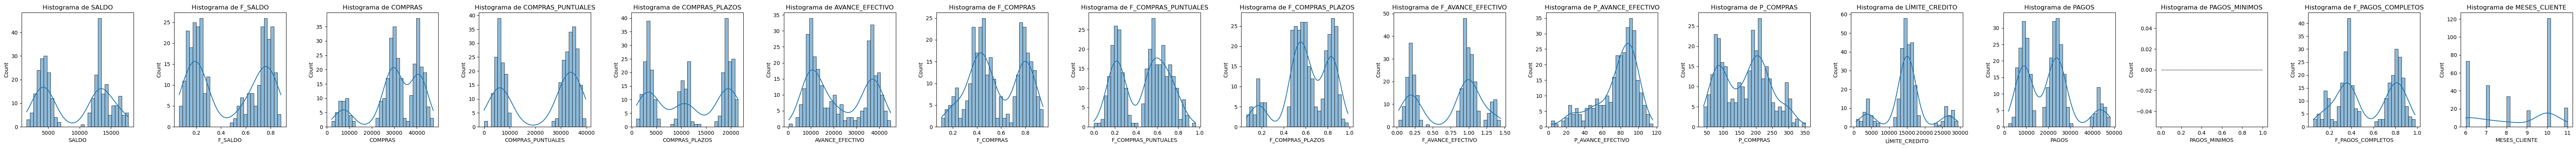

In [165]:
complt = df[df['PAGOS_MINIMOS'].isna()].copy()

number_cols = complt.select_dtypes(include = ['int64','float']).columns
num_cols = len(number_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(4 * num_cols, 4))

# Graficar histogramas para cada columna numérica
for ax, col in zip(axes, number_cols):
    sns.histplot(complt[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

Por lo cual, se opta por utilizar `KNNImputer` para realizar la imputación de valores nulos. Esto debido a que se tendría en cuenta el "grupo" al que pertenecen, en base a las demás caracteristicas, para estimar los valores nulos. Haciendo este procedimiento se logra evitar la eliminación de 300 registros que son representativos. Por lo pronto se utiliza el parámetro `n_neighbors` con 5. Esto ya que permite que la imputación refleje mejor el comportamiento de clientes con características similares en términos de pagos, saldo y límite de crédito. Al realizar este proceso se puede ver que ya no existen valores nulos. 

In [217]:
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed_array = knn_imputer.fit_transform(df[[col for col in df.columns if col != 'ID']])

not_ID = [col for col in df.columns if col != 'ID']
imputed_df = pd.DataFrame(imputed_array, index=df.index, columns=not_ID)

imputed_df = pd.concat([df['ID'], imputed_df], axis=1)

In [218]:
imputed_df.isna().sum()

ID                     0
SALDO                  0
F_SALDO                0
COMPRAS                0
COMPRAS_PUNTUALES      0
COMPRAS_PLAZOS         0
AVANCE_EFECTIVO        0
F_COMPRAS              0
F_COMPRAS_PUNTUALES    0
F_COMPRAS_PLAZOS       0
F_AVANCE_EFECTIVO      0
P_AVANCE_EFECTIVO      0
P_COMPRAS              0
LÍMITE_CREDITO         0
PAGOS                  0
PAGOS_MINIMOS          0
F_PAGOS_COMPLETOS      0
MESES_CLIENTE          0
dtype: int64

Volvemos a gráficar las distribuciones de las columnas en el conjunto de datos y notamos que no hay una diferencia significativa entre las distribuciones antes y después de resolver el problema de completitud. 

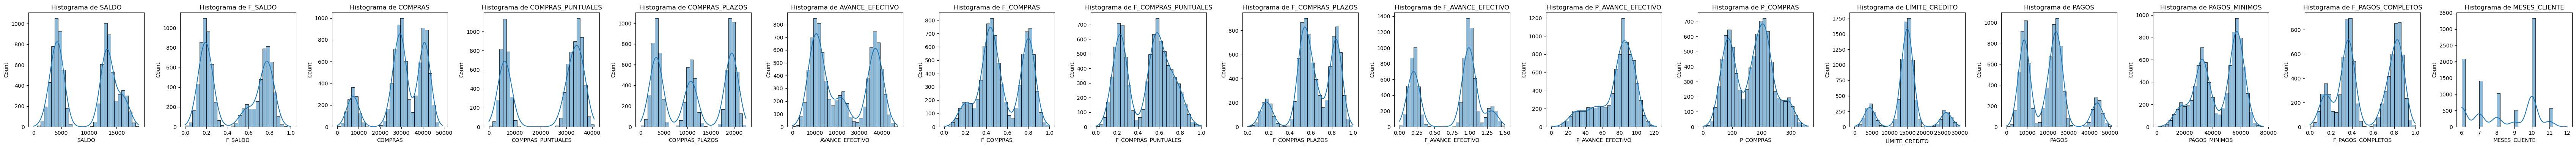

In [219]:
number_cols = imputed_df.select_dtypes(include = ['int64','float']).columns
num_cols = len(number_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(4 * num_cols, 4))

# Graficar histogramas para cada columna numérica
for ax, col in zip(axes, number_cols):
    sns.histplot(imputed_df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

## Unicidad

En esta sección se verifican que no hayan duplicados en base a todo el registro. Esto se verifica facilmente ya que en la siguiente celda se revisa si hay duplicados, como no los hay se procede con la siguiente dimensión de la calidad de datos.

In [221]:
imputed_df[imputed_df.duplicated()].shape

(0, 18)

## Validez (externa)

En cuanto a la validez podemos revisar los rangos de las frecuencias, que se supone deben ir de 0 a 1 según el diccionario. Notamos que tenemos un único problema, este es que cerca del 50% de los registros de `F_COMPRAS_PLAZOS` se encuentran debajo de 1. Luego, en el cuartil del 75% los datos empiezan a ser mayores a 1. Además de este problema, todas las demás variables cumplen con el rango de las variables según el diccionario de datos.

In [170]:
cols_ran = [col for col in imputed_df if 'F_' in col]
imputed_df[cols_ran].describe()

,F_SALDO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,F_PAGOS_COMPLETOS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.459205,0.559810,0.478032,0.623916,0.734946,0.545414
std,0.282998,0.214055,0.221873,0.208207,0.422563,0.267443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.188490,0.407273,0.250856,0.518231,0.230716,0.336732
50%,0.306650,0.505305,0.533521,0.607608,0.947651,0.432690
75%,0.756061,0.777084,0.649120,0.814929,1.029172,0.815178
max,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000


El problema anterior con la columna `F_AVANCE_EFECTIVO` se soluciona escalando estos valores de 0 a 1, para esto se puede aplicar la siguiente formula:

$$
z_i = \frac{x_i - x_{\min}}{x_{\max} - x_{\min}}
$$

O se puede usar `MinMaxScaler` de Scikit con el rango de 0 a 1. Se opta por utilizar la formula por la facilidad.

In [227]:
# Método 1
fae = imputed_df['F_AVANCE_EFECTIVO']
imputed_df['F_AVANCE_EFECTIVO'] = (fae - fae.min()) / (fae.max() - fae.min())

# Método 2
# mm_scaler = MinMaxScaler((0,1))
# imputed_df['F_AVANCE_EFECTIVO'] = mm_scaler.fit_transform(imputed_df[['F_AVANCE_EFECTIVO']])

imputed_df[['F_AVANCE_EFECTIVO']].describe()

,F_AVANCE_EFECTIVO
count,8950.000000
mean,0.489964
std,0.281708
min,0.000000
25%,0.153810
50%,0.631767
75%,0.686114
max,1.000000


En la siguiente celda se puede observar que la distribución de los datos no se ve afectada por esta distribución, por lo tanto, parece ser la mejor opción para resolver este problema.

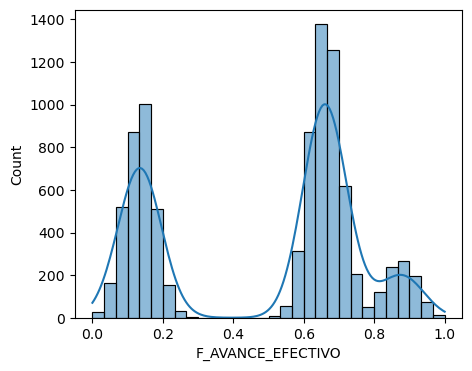

In [228]:
fig, axis = plt.subplots(figsize=(5,4))
sns.histplot(imputed_df['F_AVANCE_EFECTIVO'], kde=True, bins=30)
plt.show()

## Consistencia (interna)

En este caso no existen problemas de consistencia en los datos ya que no se observan contradicciones en las variables. Por ejemplo, en montos de compras, frecuencia de transacciones y pagos los valores siguen una lógica coherente con el comportamiento esperado de los clientes. Esto quiere decir que no hay  registros que presenten inconsistencias evidentes, como pagos negativos.

También se debe cumplir que no existen cantidades negativas en el conjunto de datos, debido a que se trabajan con conceptos no negativos, lo cual se cumple.

In [214]:
imputed_df.min()

ID                          C10001
SALDO                          0.0
F_SALDO                        0.0
COMPRAS                        0.0
COMPRAS_PUNTUALES              0.0
COMPRAS_PLAZOS                 0.0
AVANCE_EFECTIVO                0.0
F_COMPRAS                      0.0
F_COMPRAS_PUNTUALES            0.0
F_COMPRAS_PLAZOS               0.0
F_AVANCE_EFECTIVO              0.0
P_AVANCE_EFECTIVO              0.0
P_COMPRAS                      0.0
LÍMITE_CREDITO                50.0
PAGOS                          0.0
PAGOS_MINIMOS          1006.064965
F_PAGOS_COMPLETOS              0.0
MESES_CLIENTE                  6.0
dtype: object

# Transformaciones al dataset

En esta sección se opta por escalar los datos de 0 a 1 para llevar todas las variables a un rango en el que las mismas sean comparables entre sí.

In [232]:
transformed_df = imputed_df.copy()

sc = MinMaxScaler()
not_f = [col for col in imputed_df.columns if 'F_' not in col and 'ID' != col]
data = sc.fit_transform(imputed_df[not_f])

transformed_df[not_f] = data
transformed_df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.492691,0.459205,0.622474,0.562143,0.507016,0.478889,0.559810,0.478032,0.623916,0.489964,0.619261,0.460842,0.489036,0.390847,0.573112,0.545414,0.395102
std,0.268764,0.282998,0.225153,0.333010,0.314982,0.267184,0.214055,0.221873,0.208207,0.281708,0.180983,0.199223,0.184867,0.218236,0.204918,0.267443,0.292673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.224492,0.188490,0.552751,0.164329,0.166076,0.232182,0.407273,0.250856,0.518231,0.153810,0.528455,0.270950,0.448676,0.183938,0.405599,0.336732,0.166667
50%,0.630554,0.306650,0.630809,0.760797,0.481428,0.412960,0.505305,0.533521,0.607608,0.631767,0.666667,0.491620,0.497240,0.421274,0.635234,0.432690,0.333333
75%,0.721549,0.756061,0.812103,0.846280,0.850093,0.766925,0.777084,0.649120,0.814929,0.686114,0.747967,0.603352,0.541553,0.497208,0.752772,0.815178,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Una vez se realiza el escalamiento de las caracteristicas notamos que se lleva a cabo esta transformación de manera exitosa y que las distribuciones de los datos se mantienen.

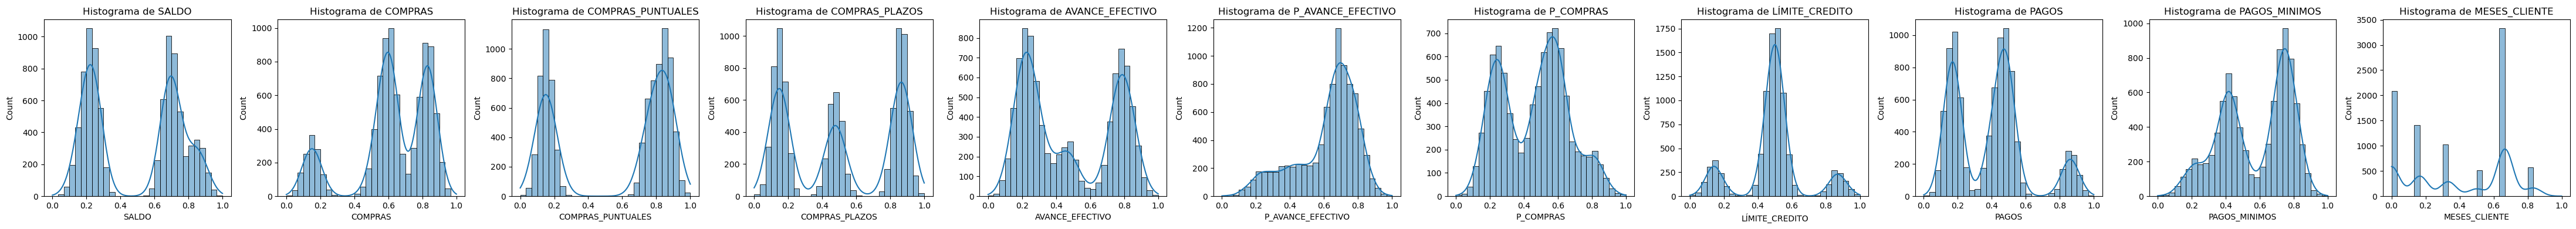

In [233]:
num_cols = len(not_f)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(4 * num_cols, 4))

# Graficar histogramas para cada columna numérica
for ax, col in zip(axes, not_f):
    sns.histplot(transformed_df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

# Revisar grupos naturales (TODO)

No es necesario hacerlo todos contra todos. Delimitar (elegir una variable y pensar en grupos naturales que pueden surgir en terminos del contexto del problema). Por lo pronto pensar en que grupos salen (compradores compulsivos, o no, quienes usan credito y a contado, etc).

# Entrenamiento modelo K-means

Implementación de K-means, descripción de las decisiones más importantes asociadas a la implementación del algoritmo y los hiperparámetros configurados.

## Busqueda hiperparámetros

# Tabla comparativa

La calidad desde el punto de vista cuantitativo puede validarse utilizando diferentes métricas intrínsecas, como el coeficiente de silueta.

# Conclusiones

Derivar conclusiones a partir de los mejores grupos identificados, que sean útiles para la organización.

# Hallazgos encontrados

Comunicar los hallazgos encontrados a la organización, explicando por qué tienen valor para el negocio.